<a href="https://colab.research.google.com/github/joseortiz87/corning-innova-service/blob/main/Equipo9_Proyecto_Innova_Corning_Configuradores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5035.10 - Proyecto integrador**

Tecnológico de Monterrey

**Tutores**

*   Dra. Grettel Barceló Alonso – Docente Titular
*   Dr. Luis Eduardo Falcón Morales – Docente Titular
*   Dra. Liliana Barbosa – Docente Tutor/Asesor


**Equipo 9**

A01794853 - Alan Alberto Contreras Meléndez

A01095149 - Jose Salvador Ortiz Sainz de Rozas

A01794935 - Sergio Enrique Pulido Morales


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/PROYECTO_VC_INNOVA_CORNING/"
os.chdir(DIR)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

In [4]:
response_df = pd.read_csv('corning_mock_dataset.csv')
response_df

,part_number,expected_configurator
0,123459876512U456M,config1
1,45RDBX98Z4U567F,config1
2,AB34ZY8912U999M,config1
3,QWEROP1234U123F,config1
4,XY98TR44G512U222M,config1
5,ZZ88991100U000F,config1
6,AABBCCDD1234567M,config2
7,HGRR9938RR5567F,config2
8,X1X2Y3Z4Z5567M,config2
9,9988776655567F,config2


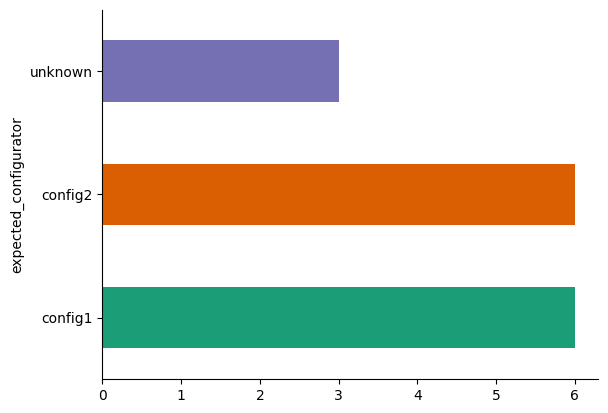

In [5]:
# @title expected_configurator

from matplotlib import pyplot as plt
import seaborn as sns
response_df.groupby('expected_configurator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   part_number            15 non-null     object
 1   expected_configurator  15 non-null     object
dtypes: object(2)
memory usage: 372.0+ bytes


In [11]:
# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [8]:
print("Tipo Objeto")
response_df.describe(include="object")

Tipo Objeto


,part_number,expected_configurator
count,15,15
unique,15,3
top,123459876512U456M,config1
freq,1,6



*  Vista general (shape, tipos, valores nulos)
*  Distribución de configuradores
*  Longitud de los números de parte
*  Análisis de frecuencia de caracteres
*  Skewness de longitudes


Vista general:
         part_number expected_configurator
0  123459876512U456M               config1
1    45RDBX98Z4U567F               config1
2    AB34ZY8912U999M               config1
3    QWEROP1234U123F               config1
4  XY98TR44G512U222M               config1

Resumen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   part_number            15 non-null     object
 1   expected_configurator  15 non-null     object
dtypes: object(2)
memory usage: 372.0+ bytes
None

Valores nulos:
part_number              0
expected_configurator    0
dtype: int64

Número de configuradores únicos:
expected_configurator
config1    6
config2    6
unknown    3
Name: count, dtype: int64


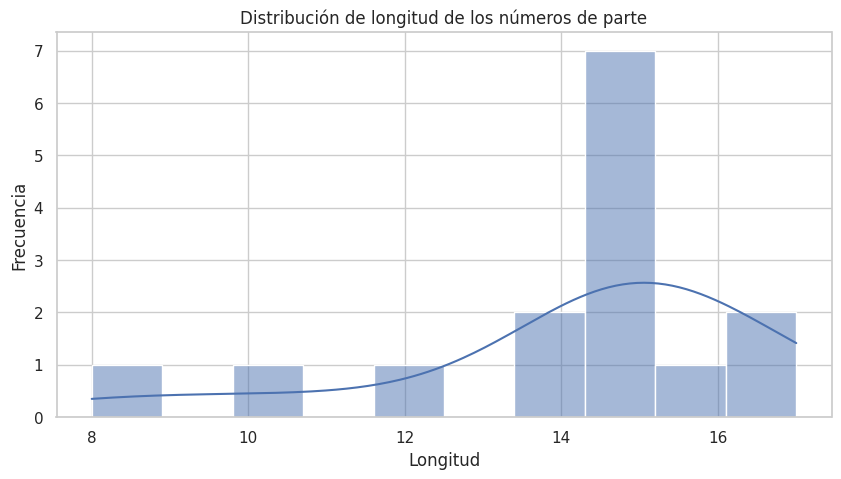

Skewness de longitud: -1.347440238569305


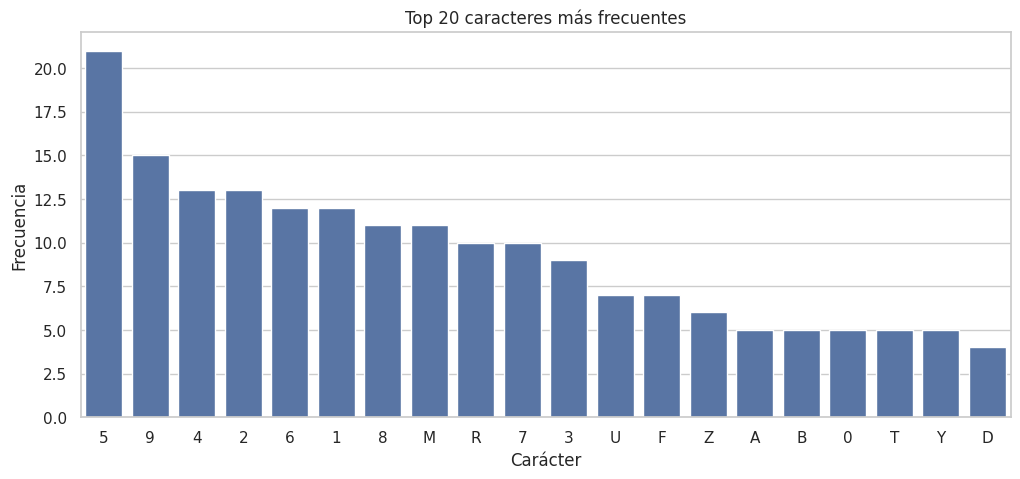

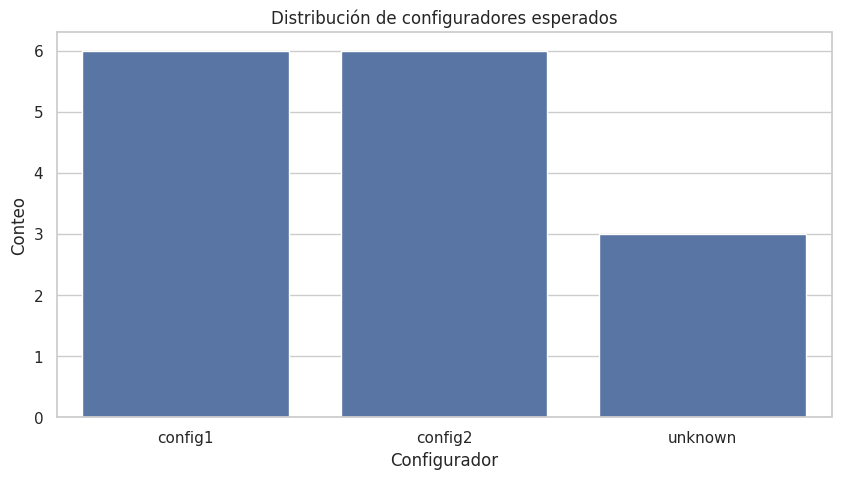

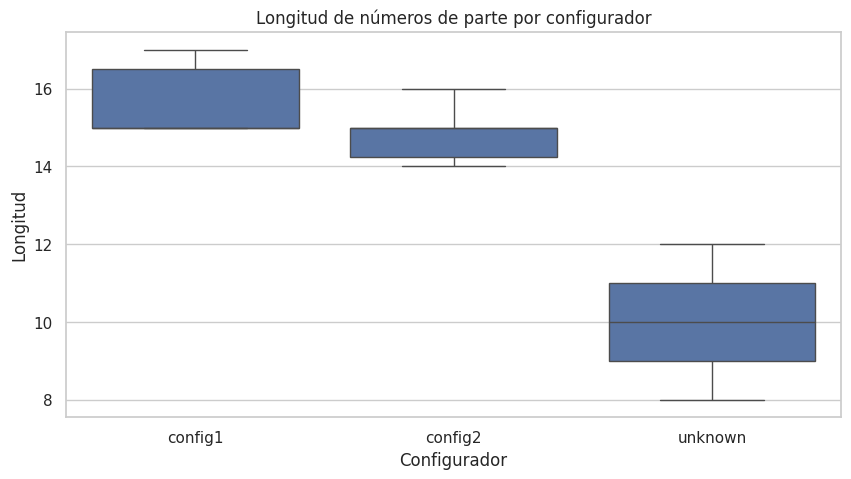

In [12]:
df = response_df

# Paso 3: Vista general del dataset
print("Vista general:")
print(df.head())

print("\nResumen:")
print(df.info())

print("\nValores nulos:")
print(df.isnull().sum())

print("\nNúmero de configuradores únicos:")
print(df['expected_configurator'].value_counts())

# Paso 4: Análisis de longitud de los números de parte
df['part_length'] = df['part_number'].astype(str).apply(len)

sns.histplot(df['part_length'], bins=10, kde=True)
plt.title("Distribución de longitud de los números de parte")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

print(f"Skewness de longitud: {skew(df['part_length'])}")

# Paso 5: Análisis de frecuencia de caracteres por configurador
def count_characters(pn):
    return pd.Series(list(pn)).value_counts()

char_freq = df['part_number'].apply(count_characters).fillna(0).sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=char_freq.index[:20], y=char_freq.values[:20])
plt.title("Top 20 caracteres más frecuentes")
plt.xlabel("Carácter")
plt.ylabel("Frecuencia")
plt.show()

# Paso 6: Conteo por configurador
sns.countplot(x="expected_configurator", data=df)
plt.title("Distribución de configuradores esperados")
plt.xlabel("Configurador")
plt.ylabel("Conteo")
plt.show()

# Paso 7: Análisis por longitud y configurador
sns.boxplot(x="expected_configurator", y="part_length", data=df)
plt.title("Longitud de números de parte por configurador")
plt.xlabel("Configurador")
plt.ylabel("Longitud")
plt.show()

*   Tokenización de números de parte
*   Vectorización con CountVectorizer
*   Reducción de dimensionalidad con PCA



Shape del vectorizado: (15, 32)


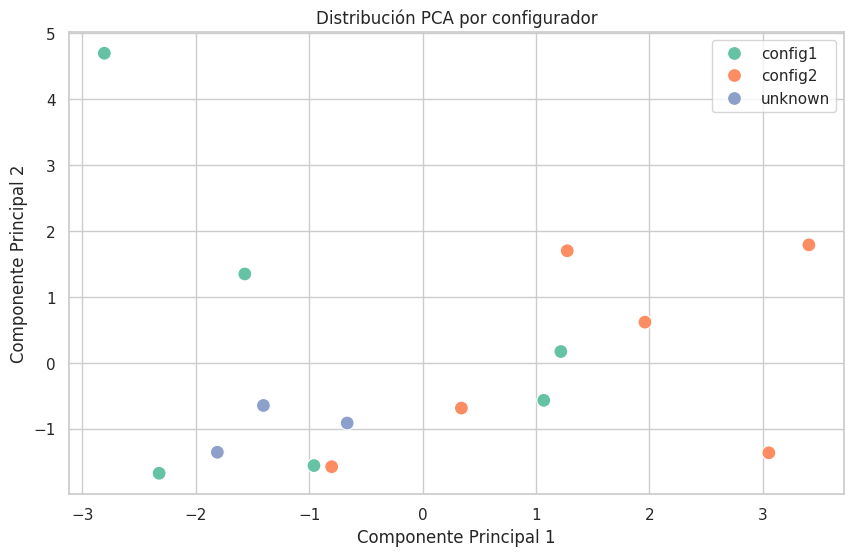

In [13]:
# Paso 8: Tokenización básica letra a letra
df['tokens'] = df['part_number'].apply(lambda x: list(str(x)))

# Paso 9: Vectorización con CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char', lowercase=False)
X = vectorizer.fit_transform(df['part_number'])

print("Shape del vectorizado:", X.shape)

# Paso 10: Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Paso 11: Visualización en 2D con Seaborn
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['configurator'] = df['expected_configurator']

plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='configurator', palette='Set2', s=100)
plt.title("Distribución PCA por configurador")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()
